# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-insta-profile/insta_test.csv
/kaggle/input/fake-insta-profile/insta_train.csv


In [2]:
! ls -l /kaggle/input/

total 0
drwxr-xr-x 2 nobody nogroup 0 May  6 16:59 fake-insta-profile


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [5]:
# Load the training dataset
instagram_df_train = pd.read_csv('/kaggle/input/fake-insta-profile/insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
# Load the testing data
instagram_df_test = pd.read_csv('/kaggle/input/fake-insta-profile/insta_test.csv')
instagram_df_test 

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


MINI CHALLENGE #1:
- Print the first and last 5 rows in both the training and testing DataFrames


In [7]:
# instagram_df_test
# instagram_df_train

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [10]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [11]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [12]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

MINI CHALLENGE #2:
- Perform exploratory data analysis on the testing dataset

In [13]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [14]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [15]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [16]:
instagram_df_test['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [17]:
instagram_df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

In [18]:
# isfake accounts for profile pic
instagram_df_test[['profile pic','fake']].value_counts()

profile pic  fake
1            0       60
             1       31
0            1       29
dtype: int64

# TASK #4: PERFORM DATA VISUALIZATION

In [19]:
# import plotly.express as px
# px.bar(instagram_df_train, x='fake',orientation='v',labels='fake')

<AxesSubplot: xlabel='fake', ylabel='count'>

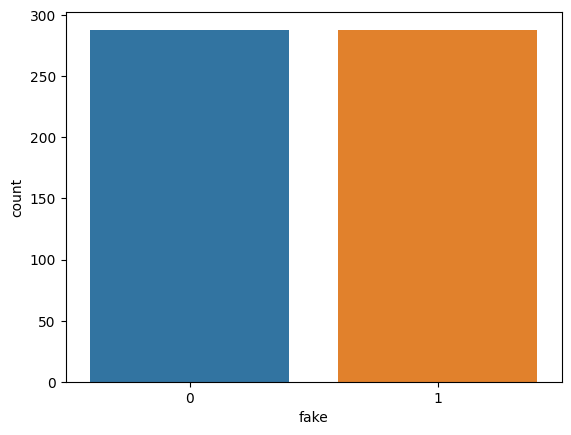

In [20]:
# Visualize the data
sns.countplot(instagram_df_train,x='fake')

<AxesSubplot: xlabel='private', ylabel='count'>

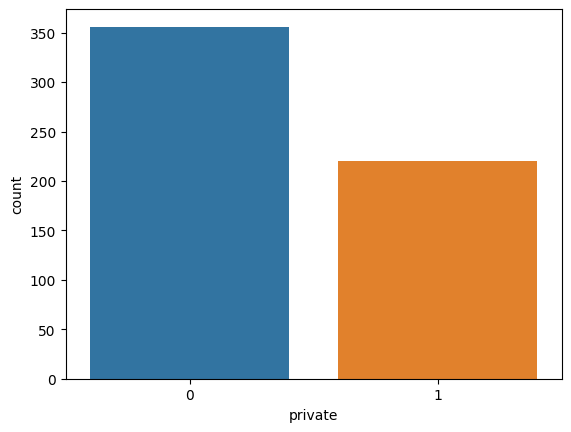

In [21]:
# Visualize the private column data
sns.countplot(instagram_df_train,x='private')

<AxesSubplot: xlabel='profile pic', ylabel='count'>

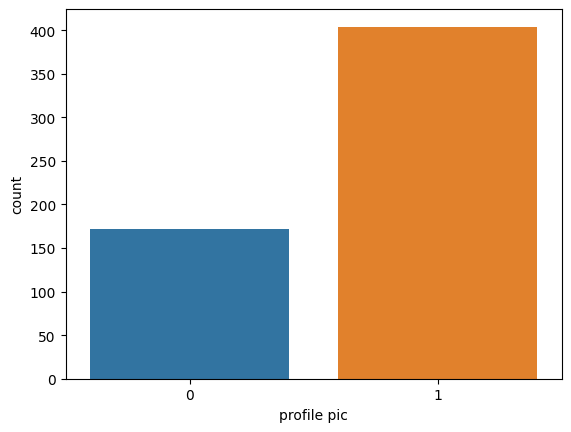

In [22]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train,x='profile pic')

<AxesSubplot: xlabel='nums/length username', ylabel='Count'>

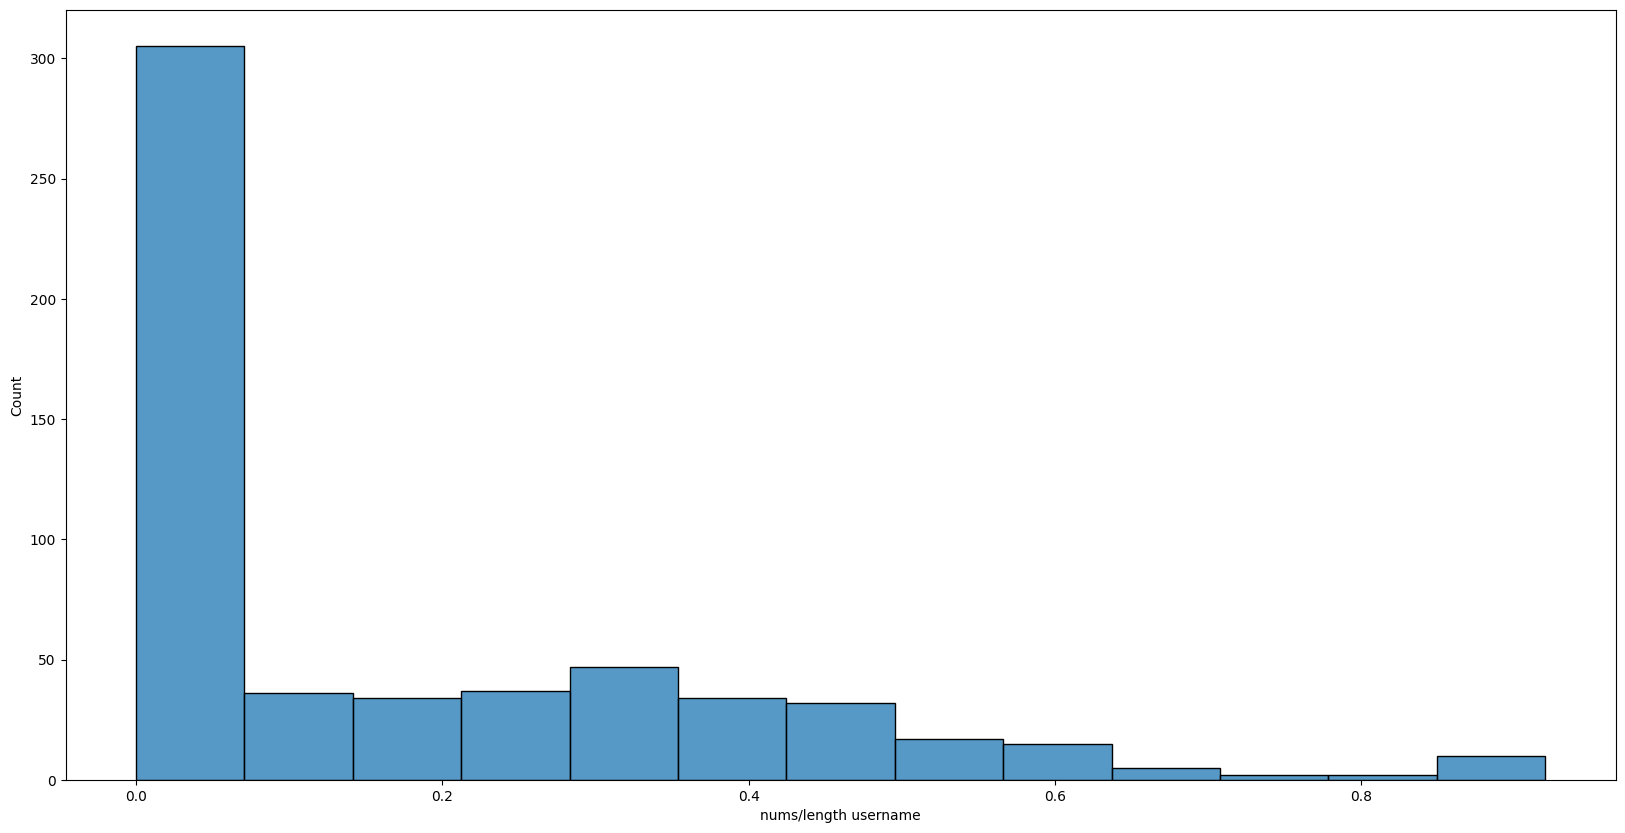

In [23]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.histplot(instagram_df_train['nums/length username'])

In [24]:
# Plot pairplot
# plt.figure(figsize = (20, 20))
# sns.pairplot(instagram_df_train)

<AxesSubplot: >

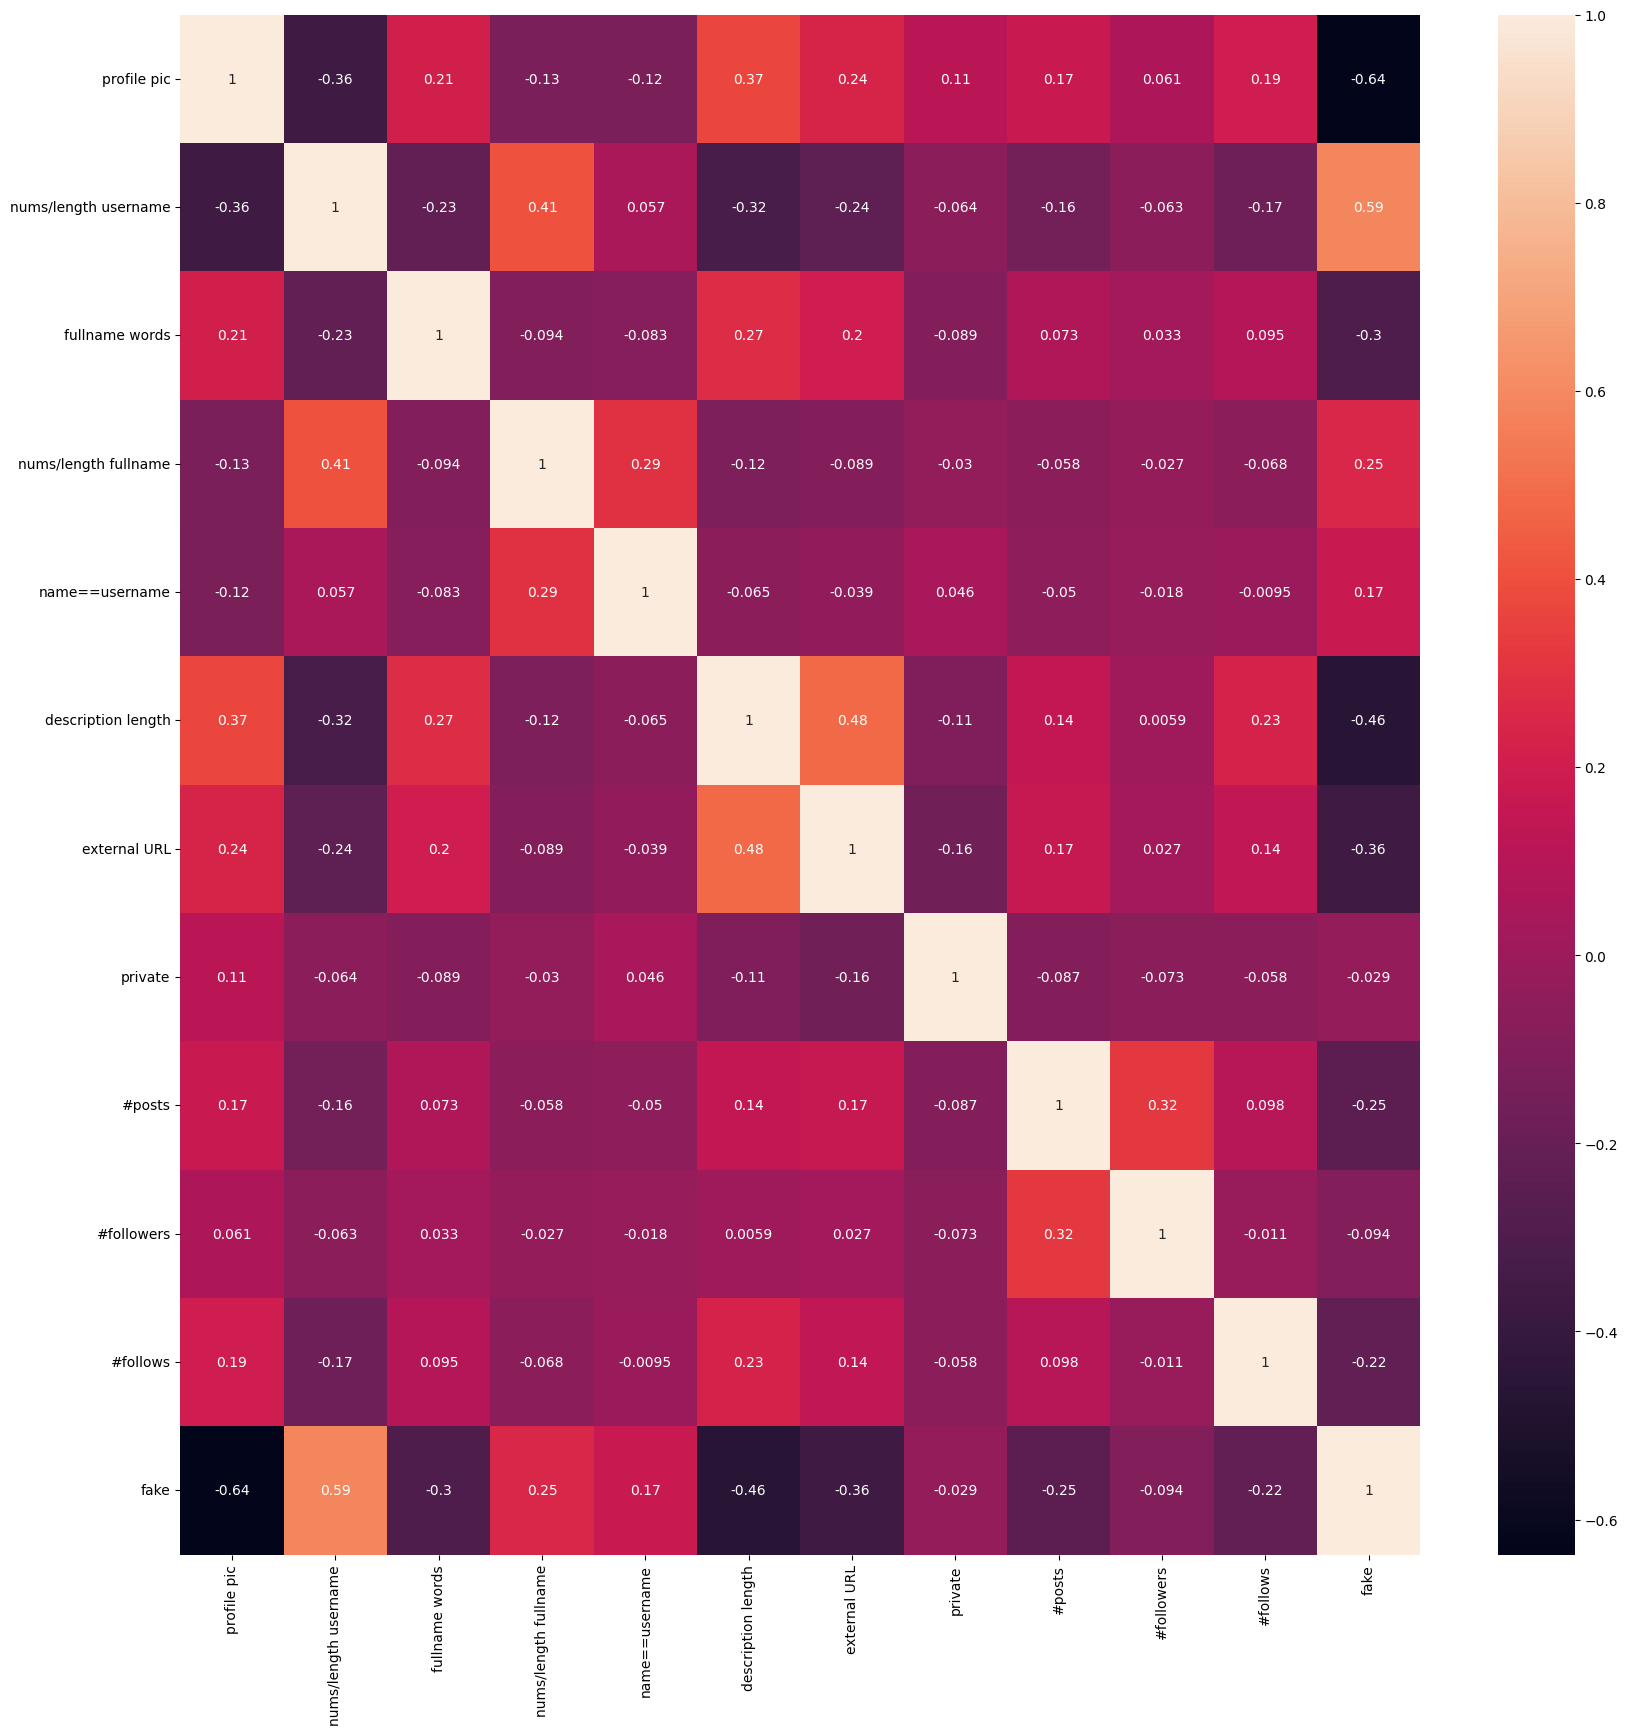

In [25]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
# ax = plt.subplot()
sns.heatmap(cm, annot = True)

MINI CHALLENGE #3:
- Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

<AxesSubplot: xlabel='fake', ylabel='count'>

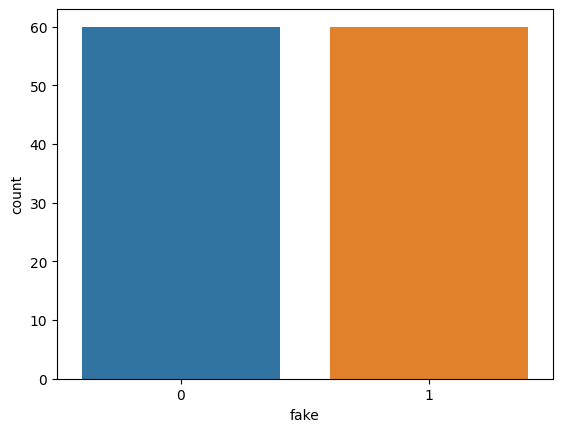

In [26]:
sns.countplot(instagram_df_test,x='fake')

<AxesSubplot: xlabel='profile pic', ylabel='count'>

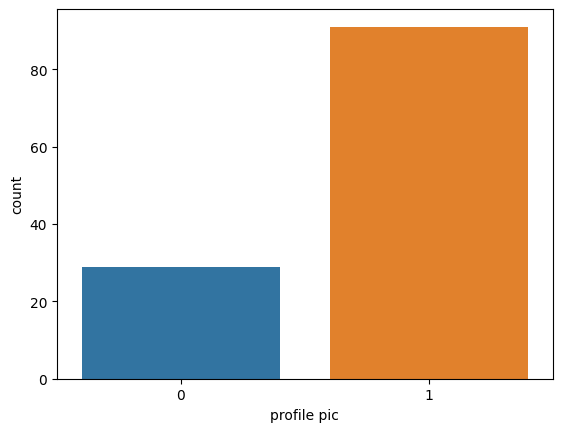

In [27]:
sns.countplot(instagram_df_test,x='profile pic')

<AxesSubplot: xlabel='private', ylabel='count'>

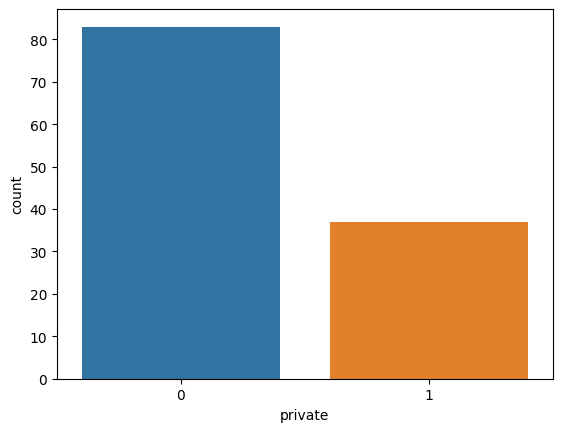

In [28]:
sns.countplot(instagram_df_test,x='private')

# TASK #5: PREPARE THE DATA TO FEED THE MODEL

In [29]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [30]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [31]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [32]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [33]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [34]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [35]:
# !pip install keras

In [36]:
# Categorize the test data
# from tensorflow.utils.np_utils import to_categorical

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [37]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [38]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

**MINI CHALLENGE #4:
- Print out the shapes of the training and testing datasets
- What is the % of the training and testing data?

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [40]:
# len(X_train)/(len(X_test)+len(X_train))*100
train_percent = X_train.shape[0]/(X_test.shape[0]+X_train.shape[0])*100
train_percent,100-train_percent

(82.75862068965517, 17.241379310344826)

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETS

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHING NEURAL NETWORKS TRAINING

- “Backpropagation neural networks: A tutorial” by Barry J.Wythoff
- “Improved backpropagation learning in neural networks with windowed momentum”, International Journal of Neural Systems, vol. 12, no.3&4, pp. 303-318. 

# TASK #8: BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [41]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12,077
Trainable params: 12,077
Non-traina

In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 17ms/step - loss: 0.6075 - accuracy: 0.7490 - val_loss: 0.5079 - val_accuracy: 0.8276
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4310 - accuracy: 0.8803 - val_loss: 0.3001 - val_accuracy: 0.9138
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8996 - val_loss: 0.1875 - val_accuracy: 0.9483
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.9035 - val_loss: 0.2009 - val_accuracy: 0.9138
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9073 - val_loss: 0.1796 - val_accuracy: 0.9138
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.9035 - val_loss: 0.1231 - val_accuracy: 0.9483
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9073 - val_loss: 0.1665 - val_accuracy: 0.9138
Epoch 8/20
17/17 [=

MINI CHALLENGE #5:
- Add a new hidden layer with 25 neurons and 'relu' activation function
- Print out the model summary and inicate how many trainable parameters

In [44]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 150)               7650      
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 25)                3775      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 25)                650       
                                                                 
 dropout_4 (Dropout)         (None, 25)               

# TASK #9: ASSESS THE PERORMANCE OF TRAINED MODEL

In [45]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


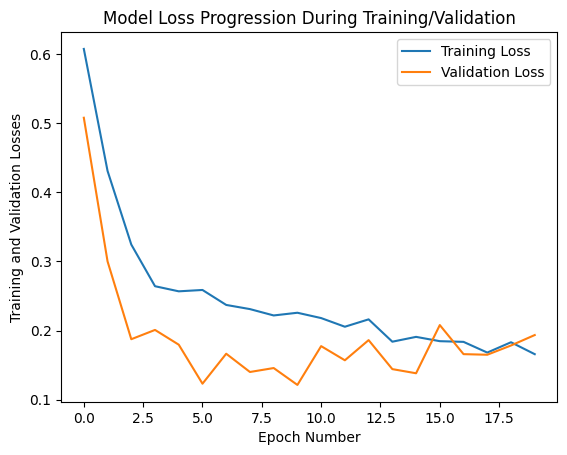

In [46]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [47]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [48]:
predicted[:2]

array([[0.4693748 , 0.53062516],
       [0.48079354, 0.51920646]], dtype=float32)

In [49]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [50]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.61      0.32      0.42        60
           1       0.54      0.80      0.64        60

    accuracy                           0.56       120
   macro avg       0.58      0.56      0.53       120
weighted avg       0.58      0.56      0.53       120



Text(0.5, 80.7222222222222, 'predicted class')

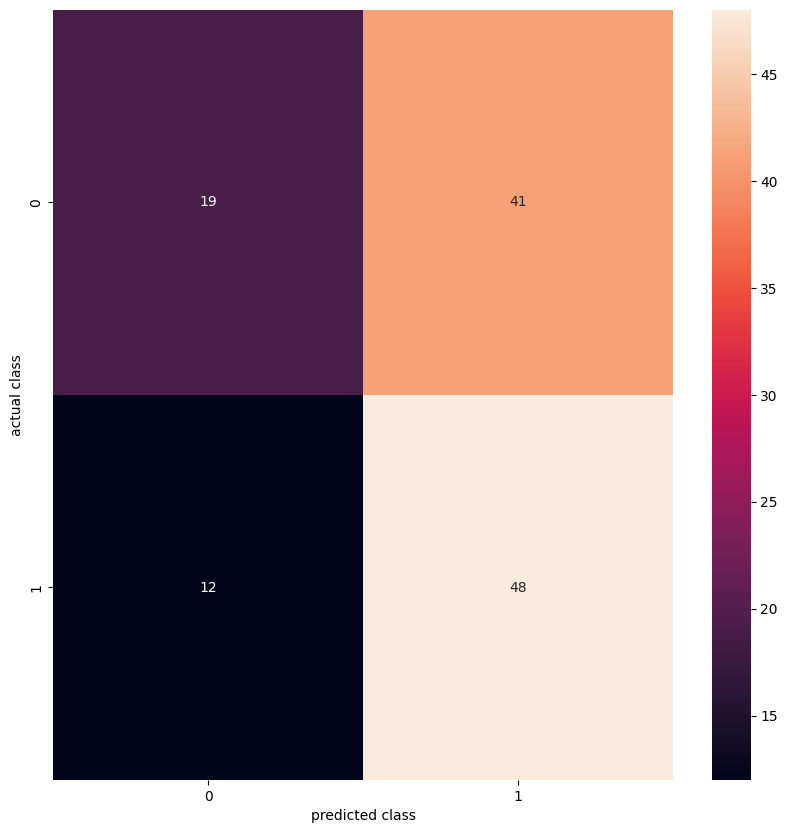

In [51]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test, predicted_value) 
sns.heatmap(cm, annot = True)
plt.ylabel('actual class')
plt.xlabel('predicted class')

MINI CHALLENGE #6:
- Retrain the model for more epochs (30) and reassess model performance. Comment on the results.

# CONGRATULATIONS ON FINISHING THE PROJECT!

MINI CHALLENGE #1 SOLUTION :
- Print the first and last 5 rows in both training and testing DataFrames

In [52]:
instagram_df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [53]:
instagram_df_train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [54]:
instagram_df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [55]:
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


MINI CHALLENGE #2 SOLUTION:
- Perform exploratory data analysis on the testing dataset

In [56]:
# Getting dataframe info
instagram_df_test.info()
# Get the statistical summary of the dataframe
instagram_df_test.describe()
# Checking null values
instagram_df_test.isnull().sum()
# Get the number of unique values in the profile pic
instagram_df_test['profile pic'].value_counts()
# Get the number of unique values
instagram_df_test['fake'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


0    60
1    60
Name: fake, dtype: int64

MINI CHALLENGE #3 SOLUTION:
- Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

<AxesSubplot: ylabel='count'>

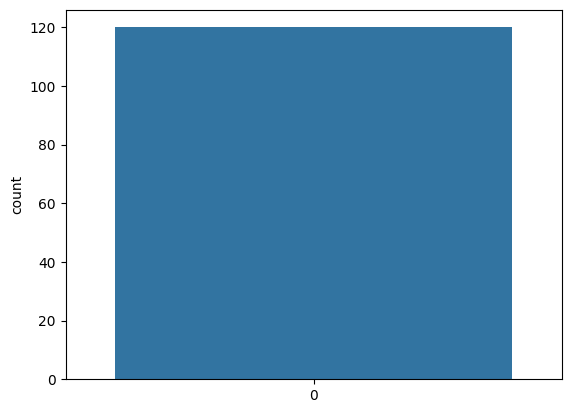

In [57]:
sns.countplot(instagram_df_test['fake'])

sns.countplot(instagram_df_test['private'])

sns.countplot(instagram_df_test['profile pic'])

MINI CHALLENGE #4 SOLUTION:
- Print out the shapes of the training and testing datasets
- What is the % of the training and testing data?


In [58]:
# print the shapes of training and testing datasets 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [59]:
Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

82.75862068965517

In [60]:
Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

17.24137931034483

MINI CHALLENGE #5 SOLUTION:
- Add a new hidden layer with 25 neurons and 'relu' activation function
- Print out the model summary and inicate how many trainable parameters


In [61]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

# Trainable params: 12,727

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                600       
                                                                 
 dense_10 (Dense)            (None, 150)               7650      
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_11 (Dense)            (None, 25)                3775      
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 dense_12 (Dense)            (None, 25)                650       
                                                                 
 dropout_7 (Dropout)         (None, 25)               

MINI CHALLENGE #6 SOLUTION:
- Retrain the model for more epochs (~30) and reassess model performance

In [62]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs_hist = model.fit(X_train, y_train, epochs = 30,  verbose = 1, validation_split = 0.1)

Epoch 1/30
17/17 [==============================] - 1s 15ms/step - loss: 0.6633 - accuracy: 0.6448 - val_loss: 0.5526 - val_accuracy: 0.7759
Epoch 2/30
17/17 [==============================] - 0s 4ms/step - loss: 0.4884 - accuracy: 0.8398 - val_loss: 0.3551 - val_accuracy: 0.8621
Epoch 3/30
17/17 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8629 - val_loss: 0.2471 - val_accuracy: 0.8966
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.9131 - val_loss: 0.2569 - val_accuracy: 0.8793
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.9035 - val_loss: 0.1873 - val_accuracy: 0.9138
Epoch 6/30
17/17 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.9015 - val_loss: 0.2222 - val_accuracy: 0.8966
Epoch 7/30
17/17 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.9073 - val_loss: 0.1800 - val_accuracy: 0.9138
Epoch 8/30
17/17 [=